In [76]:
import pandas as pd
colors = ['lightpink', 'mediumaquamarine', 'peachpuff', 'powderblue']

# 1
table = pd.read_csv('Billionaires.csv', sep=',')
print(table[:100])

    rank  finalWorth               category  \
0      1      211000       Fashion & Retail   
1      2      180000             Automotive   
2      3      114000             Technology   
3      4      107000             Technology   
4      5      106000  Finance & Investments   
5      6      104000             Technology   
6      7       94500  Media & Entertainment   
7      8       93000                Telecom   
8      9       83400            Diversified   
9     10       80700             Technology   
10    11       80500       Fashion & Retail   
11    12       79200             Technology   
12    13       77300       Fashion & Retail   
13    14       76000             Technology   
14    15       68000        Food & Beverage   
15    16       64400             Technology   
16    17       59000            Diversified   
17    17       59000            Diversified   
18    19       58800       Fashion & Retail   
19    20       57600       Fashion & Retail   
20    21     

In [77]:
# 2
print( table[table.notna().sum().sort_values().index].info())
# 4 столбца с наибольшим количеством пропусков: organization, title, residenceStateRegion, state
table.drop(columns=['organization', 'title', 'residenceStateRegion', 'state'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   organization                                325 non-null    object 
 1   title                                       339 non-null    object 
 2   residenceStateRegion                        747 non-null    object 
 3   state                                       753 non-null    object 
 4   cpi_change_country                          2456 non-null   float64
 5   cpi_country                                 2456 non-null   float64
 6   tax_revenue_country_country                 2457 non-null   float64
 7   total_tax_rate_country                      2458 non-null   float64
 8   life_expectancy_country                     2458 non-null   float64
 9   gross_tertiary_education_enrollment         2458 non-null   float64
 10  gross_primar

In [78]:
# 3
sum_worth = table['finalWorth'].sum()
print('Cуммарный капитал всех миллиардеров:', sum_worth)

Cуммарный капитал всех миллиардеров: 12206800


In [79]:
# 4
count_billionaires = table.groupby('country').agg({'personName' : 'count'})
count_billionaires.columns = ['Count']
print(count_billionaires)

                          Count
country                        
Algeria                       1
Andorra                       1
Argentina                     4
Armenia                       1
Australia                    43
Austria                      11
Bahamas                       2
Bahrain                       1
Belgium                       3
Bermuda                       2
Brazil                       44
British Virgin Islands        1
Cambodia                      1
Canada                       42
Cayman Islands                3
Chile                         6
China                       523
Colombia                      1
Cyprus                        5
Czech Republic                7
Denmark                       7
Egypt                         4
Eswatini (Swaziland)          1
Finland                       7
France                       35
Georgia                       1
Germany                     102
Greece                        3
Guernsey                      1
Hong Kon

Axes(0.125,0.11;0.775x0.77)


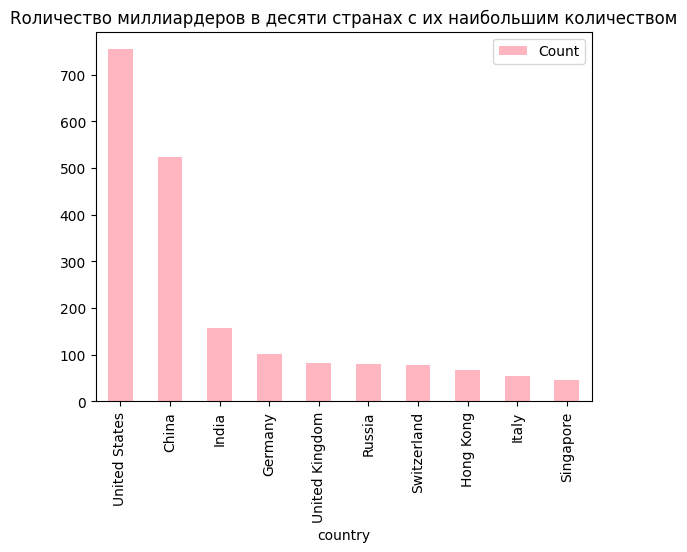

In [80]:
# 5
print(count_billionaires.sort_values(by='Count', ascending=False)[:10].
      plot(kind='bar', title='Rоличество миллиардеров в десяти странах с их наибольшим количеством', color=colors))

In [81]:
# 6
print(table[((table['country'] == 'United States') |
            (table['country'] == 'China')) &
             (table['age'] > 70)][['personName', 'age', 'country']])

                          personName    age        country
3                      Larry Ellison   78.0  United States
4                     Warren Buffett   92.0  United States
6                  Michael Bloomberg   81.0  United States
16             Charles Koch & family   87.0  United States
18                        Jim Walton   74.0  United States
19               Rob Walton & family   78.0  United States
20                      Alice Walton   73.0  United States
24              Phil Knight & family   85.0  United States
30                   Jacqueline Mars   83.0  United States
31                         John Mars   87.0  United States
34           Miriam Adelson & family   77.0  United States
40                  Alain Wertheimer   74.0  United States
41                 Gerard Wertheimer   72.0  United States
48                        Jim Simons   84.0  United States
49                Stephen Schwarzman   76.0  United States
56                   Thomas Peterffy   78.0  United Stat

In [82]:
# 7
print(table[table['country'] == 'Russia']['personName'])

61                  Vladimir Potanin
69                    Vladimir Lisin
72         Leonid Mikhelson & family
78         Alexey Mordashov & family
79                   Vagit Alekperov
90                 Gennady Timchenko
166        Suleiman Kerimov & family
174                 Viktor Rashnikov
189           Andrei Guriev & family
207        Roman Abramovich & family
222                Tatyana Bakalchuk
249                      German Khan
261                     Leonid Fedun
273            Andrei Skoch & family
312               Iskander Makhmudov
361                Viktor Vekselberg
424                Alexander Abramov
539                Viktor Kharitonin
634                  Mikhail Shelkov
643                  Andrei Kozitsyn
688                      Igor Kesaev
831                Mikhail Gutseriev
839                 Arkady Rotenberg
853                   Igor Altushkin
917                  Sergei Galitsky
940                  Roman Trotsenko
956                   Sergei Gordeev
9

[<Axes: ylabel='finalWorth'>]


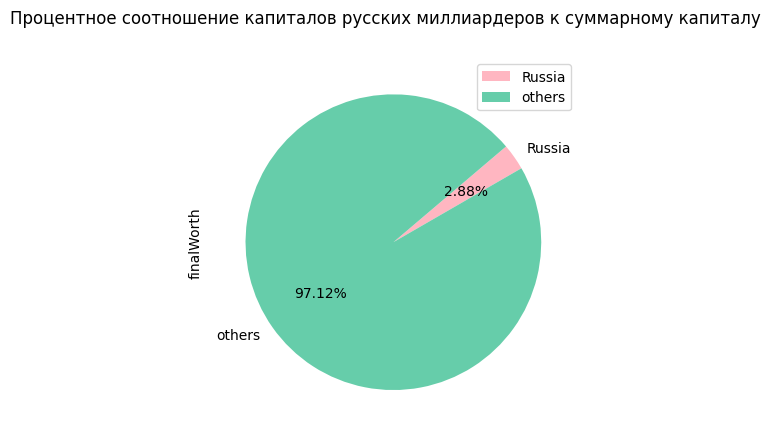

In [83]:
table2 = table
table2.loc[table['country'] != 'Russia', 'country'] = 'others'
print(table2.groupby('country').agg({'finalWorth' : 'sum'}).
      plot(kind='pie', autopct='%1.2f%%', title='Процентное соотношение капиталов русских миллиардеров к суммарному капиталу', colors=colors, subplots=True, startangle=30))


In [84]:
# 8
print(table.groupby(['gender', 'source']).agg({'personName' : 'count'}))

                                            personName
gender source                                         
F      Adhesives                                     1
       Aerospace                                     1
       Agribusiness                                  1
       Agriculture                                   1
       Airlines                                      1
       Aluminum products                             1
       Amazon                                        1
       Apple, Disney                                 1
       Appliances                                    2
       Art collection                                1
       Auto parts                                    1
       Auto parts, distribution                      1
       BMW, pharmaceuticals                          1
       Banking                                       6
       Banking, credit cards                         1
       Banking, shipping                             1
       Bat

In [85]:
# 9
print(table.groupby('category').agg({'personName' : 'count'}))

                            personName
category                              
Automotive                          73
Construction & Engineering          45
Diversified                        187
Energy                             100
Fashion & Retail                   266
Finance & Investments              372
Food & Beverage                    212
Gambling & Casinos                  25
Healthcare                         201
Logistics                           40
Manufacturing                      324
Media & Entertainment               91
Metals & Mining                     74
Real Estate                        193
Service                             53
Sports                              39
Technology                         314
Telecom                             31


Axes(0.125,0.11;0.775x0.77)


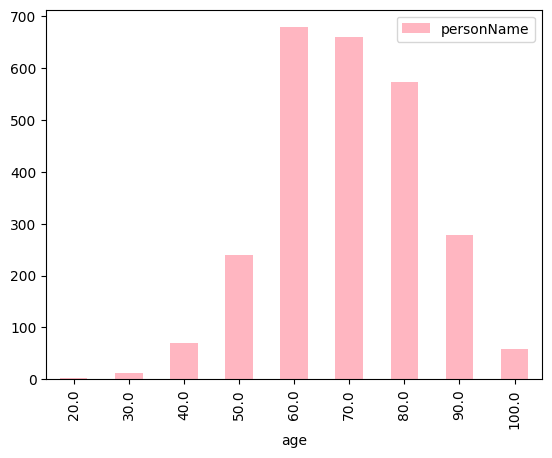

In [86]:
# 10
table2 = table[(table['age'] > 10) & (table['age'] <= 100)]
for i in range(1, 10):
    table2.loc[(table['age'] > i * 10) & (table['age'] <= i * 10 + 10), 'age'] = i * 10 + 10

print(table2.groupby('age').agg({'personName' : 'count'}).plot(kind='bar', color=colors[0]))

Axes(0.125,0.11;0.775x0.77)


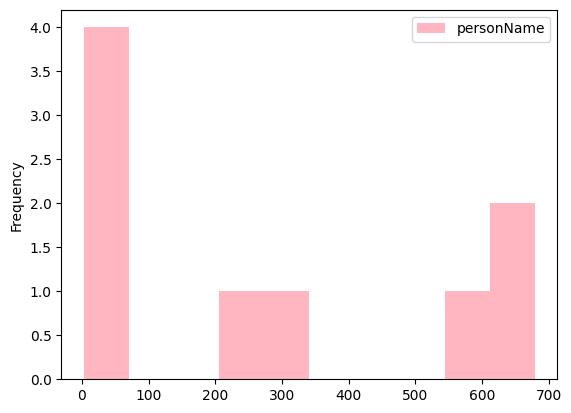

In [87]:
table2 = table[(table['age'] > 10) & (table['age'] <= 100)]
for i in range(1, 10):
    table2.loc[(table['age'] > i * 10) & (table['age'] <= i * 10 + 10), 'age'] = i * 10 + 10

print(table2.groupby('age').agg({'personName' : 'count'}).plot(kind='hist', color=colors[0]))